In [1]:
# Necessary library importation 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from PIL import Image
import pandas as pd
from wordcloud import WordCloud
import nltk
import re
import spacy

In [2]:
import en_core_web_sm
nlp = en_core_web_sm.load()
from nltk.corpus import stopwords
nlp = en_core_web_sm.load()
NER = spacy.load("en_core_web_sm")
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yadavvinamrata/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yadavvinamrata/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
#load the data 
df = pd.read_csv("Data/data_science_book.csv")

# Data cleaning 

In [4]:
#cleaning and converting the string into integer and float of these columns for later use 
df["Rating stars"] = df["Rating stars"].apply(lambda x: re.findall("\d+\.\d+", str(x)))
df["Rating stars"] = df["Rating stars"].apply(lambda x: 0 if len(x)==0 else float(x[0]))
df["Rating count"] = df["Rating count"].map(lambda x: str(x).replace(",", ""))
df["Rating count"] = df["Rating count"].apply(lambda x: 0 if len(x)==0 else int(x))

In [5]:
df.head()

,Unnamed: 0,Nme of book,Price,Rating stars,Rating count,Link to the book
0,0,Machine Learning: 4 Books in 1: The #1 Beginne...,24.67,4.6,355,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
1,1,Data Science Projects with Python: A case stud...,36.99,4.6,49,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
2,2,Heard In Data Science Interviews: Over 650 Mos...,37.99,3.2,52,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
3,3,"Becoming a Data Head: How to Think, Speak and ...",24.49,4.6,174,https://www.amazon.com/Becoming-Data-Head-Unde...
4,4,Essential Math for Data Science: Take Control ...,45.07,4.4,24,https://www.amazon.com/Essential-Math-Data-Sci...


In [6]:
# drop the Unnamed: 0 column and rename the misspelled column
df = df.drop("Unnamed: 0", axis = 1)
df = df.rename(columns = {"Nme of book" :"Name of book"})

In [7]:
df = df.drop_duplicates()

In [8]:
# descriptive information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name of book      1650 non-null   object 
 1   Price             1650 non-null   float64
 2   Rating stars      1650 non-null   float64
 3   Rating count      1650 non-null   int64  
 4   Link to the book  1650 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 77.3+ KB


In [9]:
df.shape

(1650, 5)

# Top 20 Highly rated book on Amazon 

In [10]:
df1 = df.nlargest(20, ["Rating count"]) 

In [11]:
list(df1["Name of book"])

['Never Split the Difference: Negotiating As If Your Life Depended On It',
 'Why We Sleep: Unlocking the Power of Sleep and Dreams',
 'Invisible Women: Data Bias in a World Designed for Men',
 'Cracking the Coding Interview: 189 Programming Questions and Solutions',
 'Eat to Beat Disease: The New Science of How Your Body Can Heal Itself',
 'Eat to Beat Disease: The New Science of How Your Body Can Heal Itself',
 'Expecting Better: Why the Conventional Pregnancy Wisdom Is Wrong--and What You Really Need to Know (The ParentData Series)',
 'Baby University Board Book Set: A Science for Toddlers Board Book Set (Science Gifts for Kids) (Baby University Board Book Sets)',
 'Python: - The Bible- 3 Manuscripts in 1 book: -Python Programming For Beginners -Python Programming For Intermediates -Python Programming for Advanced (Your place to learn Python with ease)',
 'Python: - The Bible- 3 Manuscripts in 1 book: -Python Programming For Beginners -Python Programming For Intermediates -Python Pro

In the most rated list of books we can see there are few books not related to data science because when I typed the keywords to search the books, I was not very specific I wrote "Data science book" but we can write very specific keywords to seach the products or anything and then scrape. 

# 20 Highly rated and highest star Books on amazon

In [12]:
df2 = df1.nlargest(20, ["Rating stars"])

In [13]:
list(df2["Name of book"])

['Never Split the Difference: Negotiating As If Your Life Depended On It',
 'Pandemia: How Coronavirus Hysteria Took Over Our Government, Rights, and Lives',
 'Designing Data-Intensive Applications: The Big Ideas Behind Reliable, Scalable, and Maintainable Systems',
 'Why We Sleep: Unlocking the Power of Sleep and Dreams',
 'Invisible Women: Data Bias in a World Designed for Men',
 'Cracking the Coding Interview: 189 Programming Questions and Solutions',
 'Baby University Board Book Set: A Science for Toddlers Board Book Set (Science Gifts for Kids) (Baby University Board Book Sets)',
 'Go for No! Yes is the Destination, No is How You Get There',
 'Storytelling with Data: A Data Visualization Guide for Business Professionals',
 'Principles for Dealing with the Changing World Order: Why Nations Succeed and Fail',
 'The Art of Statistics: How to Learn from Data',
 'Expecting Better: Why the Conventional Pregnancy Wisdom Is Wrong--and What You Really Need to Know (The ParentData Series)',

In [14]:
#Cleaning the scraped_text
def text_cleaning (input_text):    
    processed_text = str(input_text).lower()
    processed_text = re.sub('[^a-zA-Z]', ' ', processed_text )
    processed_text = re.sub(r'\s+', ' ', processed_text)
    return processed_text
#input the text 
# processed_text = text_cleaning (doc)

# Preparing the text
def prepare_text(processed_text):
    sentences = nltk.sent_tokenize(processed_text)
    words = [nltk.word_tokenize(sent) for sent in sentences]
    return words

# Removing Stop Words
def remove_stopwords(words):
    lst_word = []                   #store all the cleaned dont contain stop words in this variable 
    for i in range(len(words)):
        words[i] = [w for w in words[i] if w not in stopwords.words('english')]
        lst_word.append(words[i])
    return lst_word

In [15]:
#Cleaning, processing and removing stopwords from the name of book
processed_text = [text_cleaning(i) for i in (df["Name of book"])]
words = [nltk.word_tokenize(sent) for sent in processed_text]
filterd= remove_stopwords(words)
def flatten(lst):
    return [item for sublist in lst for item in sublist]
flattened_lst = flatten(filterd)

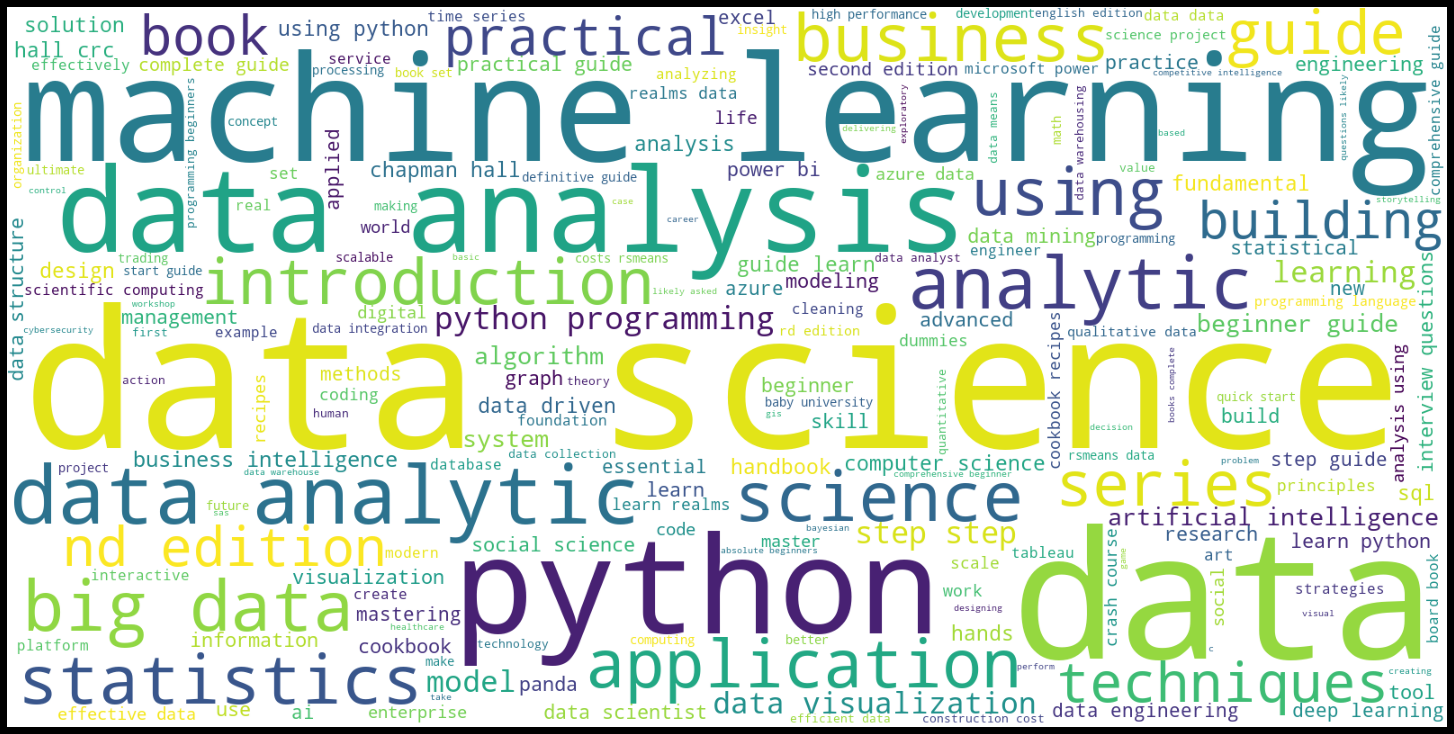

In [16]:
#Generate wordscloud from name of books 
listToStr = ' '.join(map(str, flattened_lst))
wordcloud = WordCloud(width=1600, height=800,background_color="white").generate(listToStr)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a way of measuring how relevant a word is to a document in a collection of documents.

1. Term Frequency (TF): how many times a word appears in a document.
2. Inverse Document Frequency (IDF): the inverse document frequency of the word across a collection of documents. Rare words have high scores, common words have low scores.

* Use case of TFIDF:TF-IDF has many uses, such as in information retrieval, text analysis, keyword extraction, and as a way of obtaining numeric features from text for machine learning algorithms.

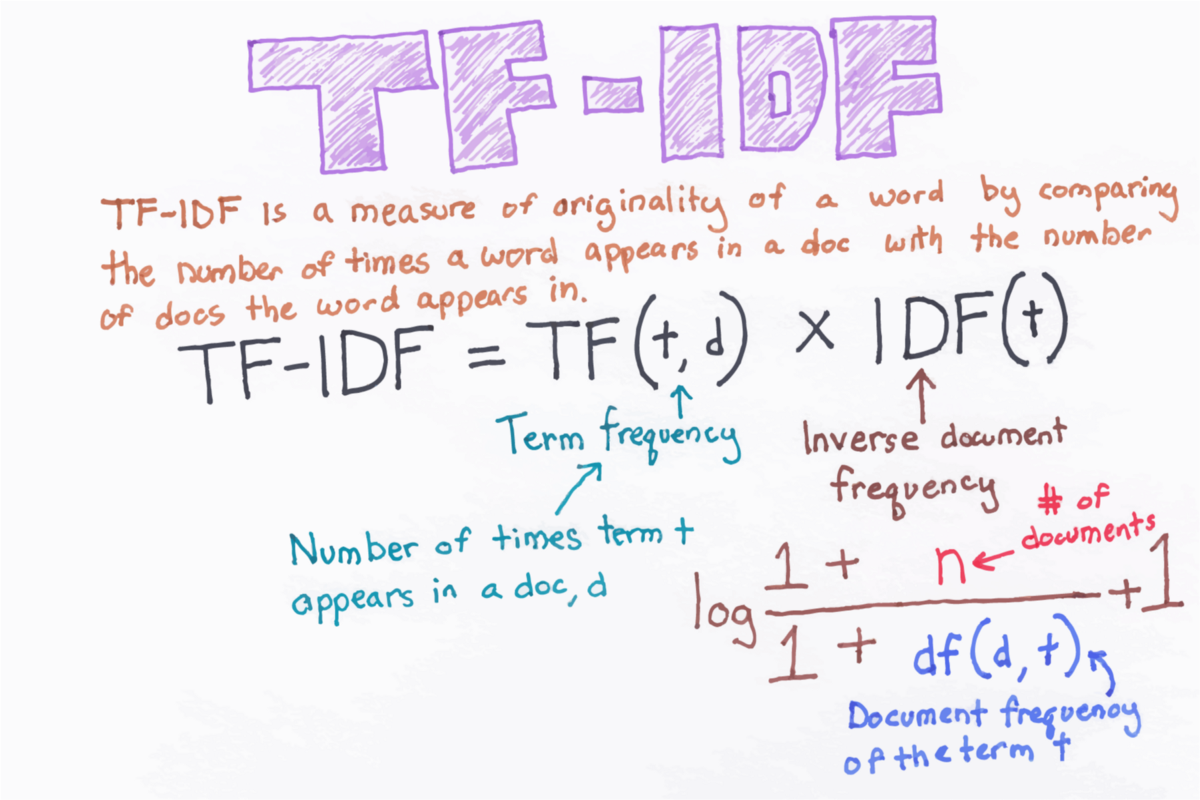

In [17]:
from IPython.display import Image
Image("Img/tfidf.png")

# One word level Term frequency

In [18]:
#function to calculate the term frequency in the name of the book 
def term_frequency_calculator(lst_words):
    #create an empty dictionary
    data = {}
    for item in lst_words:
        #iterate the count of words over the dictionary
        if item in data:
            data[item]+=1
        else:
            data[item]=1
    word_size = sum(v for k,v in data.items())
    return [(word,freq/word_size) for word,freq in data.items()]

In [19]:
#list of tuples 
lst_tuples = term_frequency_calculator(flattened_lst)
#Create a dataframe from the list of tuples 
tf = pd.DataFrame(lst_tuples, columns = ["Words", "Frequency"])
#tf.head()

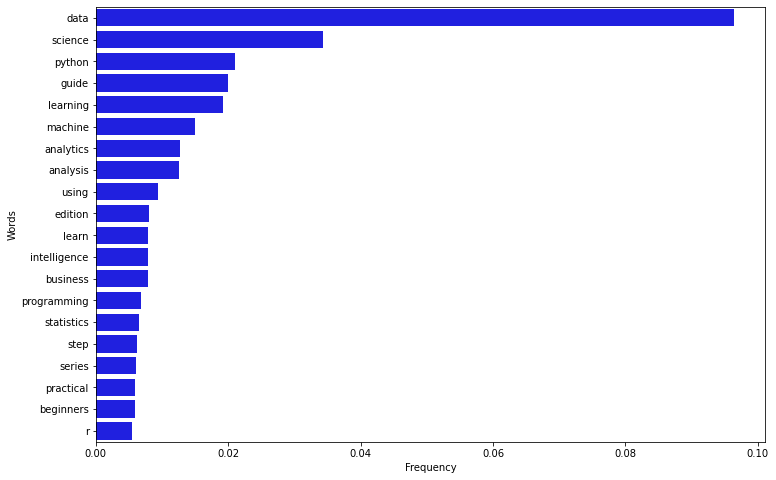

In [20]:
fig = plt.figure(figsize =(12,8))
tf_frequnt = tf.sort_values(by=['Frequency'], ascending=False)
tf_frequnt = tf_frequnt.head(20)
sns.barplot(x="Frequency", y="Words", data=tf_frequnt, color="b")

# Ngram level TFIDF (Tri-gram)

In [21]:
text = [' '.join(map(str,i)) for i in filterd]

In [22]:
#Ngrams 
vectorizer = CountVectorizer(ngram_range = (3,3))
X1 = vectorizer.fit_transform(text) 
features = (vectorizer.get_feature_names())
#print("\n\nFeatures : \n", features)
#print("\n\nX1 : \n", X1.toarray())

# Calculate Term frequency using tfidfvecoriser library from sklearn 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/utils.py:113: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  rgb = mplcol.colorConverter.to_rgb(color)


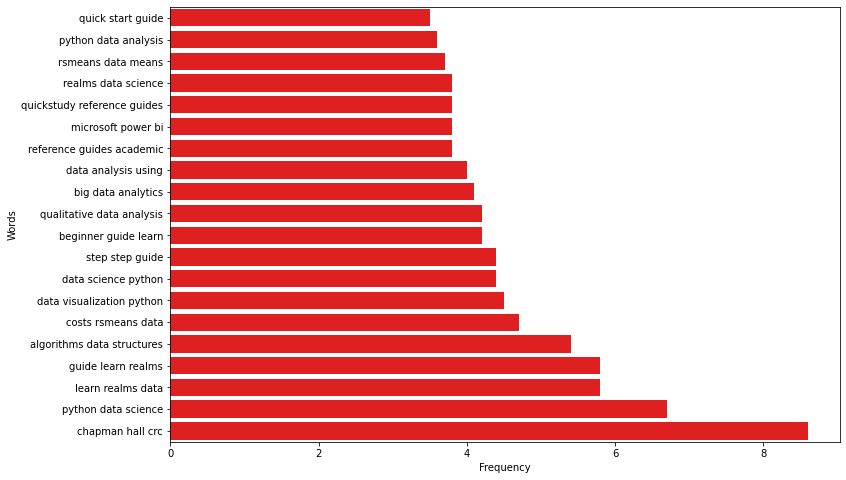

In [23]:
#Tfidf vectorizer
vect = TfidfVectorizer(ngram_range = (3,3))
#fit the text to the model
X = vect.fit_transform(text)
#create columns as term and their frequency in different column 
features_rank = list(zip(vect.get_feature_names(), [round(x[0],1) for x in X.sum(axis=0).T.tolist()]))
#create a dataframe 
df = pd.DataFrame(features_rank, columns =['Words', 'Frequency'])
#Sort the values by frequency to plot the most frequent words 
tf = df.sort_values(by=['Frequency'], ascending=True)
tf = tf.tail(20)
fig = plt.figure(figsize =(12,8))
sns.barplot(x="Frequency", y="Words", data=tf,
            label="Total", color="R")